# Part 1: Data Loading

### Import libraries

In [6]:
import joblib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.svm import LinearSVC

In [7]:
RANDOM_SEED = 111

In [8]:
fontsizes = {
    'title': 15,
    'axis': 14,
    'ticks': 11
}

### Load training data

In [9]:
%%time
X_train_multi = pd.read_csv("../data/multi/X_train.csv", header=None)
y_train_multi = pd.read_csv("../data/multi/Y_train.csv", header=None)

CPU times: user 13.1 s, sys: 1.07 s, total: 14.1 s
Wall time: 15.1 s


# Part 2: Data cleaning & create new input features

In [8]:
#todo

# Part 3. Data Visualisation & Analysis

In [3]:
X_train_binary.shape

(62210, 964)

--> Training data summary:
* There are 62,210 rows (images)
* There are 964 columns (feature):
    * first 900 columns = **HoG (Histogram of oriented Gradients)** extracted from the image (10×10 px cells, 9 orientations, 2×2 blocks).
    * next 16 columns drawn from a **normal distribution** (µ = 0.5, σ = 2)
    * last 48 columns correspond to 3 **colour histograms** extracted from the same image, one for each channel (RGB), with 16 bins per channel.

They are split into 3 different sets for further analysis and visualisation

In [4]:
X_train_HoG = X_train_binary.iloc[:, :900]
X_train_normal_dist = X_train_binary.iloc[:, 900:916]
X_train_colour_hists = X_train_binary.iloc[:, 916:]

### A. HoG (Histogram of oriented Gradients)

In [5]:
X_train_HoG.head(5)

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.142099,0.081518,0.083921,0.126117,0.172096,0.100030,0.025462,0.059543,0.081057,0.154092,...,0.037176,0.202987,0.072584,0.153205,0.109442,0.122022,0.060017,0.031778,0.072015,0.097999
1,0.248079,0.138499,0.066726,0.105121,0.196336,0.084412,0.244487,0.248079,0.104019,0.236483,...,0.058132,0.230370,0.081907,0.139281,0.139641,0.259892,0.259892,0.253810,0.259892,0.102828
2,0.193626,0.091769,0.180461,0.184008,0.217402,0.217402,0.217402,0.125612,0.121047,0.217402,...,0.120672,0.251554,0.072907,0.112687,0.127137,0.194310,0.070367,0.096034,0.105702,0.103384
3,0.123813,0.058378,0.097994,0.091008,0.206869,0.251324,0.251324,0.193339,0.156478,0.242829,...,0.138086,0.189607,0.054868,0.099990,0.052163,0.211206,0.192969,0.225437,0.078157,0.148694
4,0.226959,0.138531,0.114237,0.062622,0.193829,0.130002,0.147443,0.226959,0.226959,0.226959,...,0.090555,0.161151,0.086103,0.097058,0.217218,0.119377,0.090272,0.050110,0.014789,0.062420


In [6]:
X_train_HoG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62210 entries, 0 to 62209
Columns: 900 entries, 0 to 899
dtypes: float64(900)
memory usage: 427.2 MB


Visualise a reconstruction of the image from the HoG.

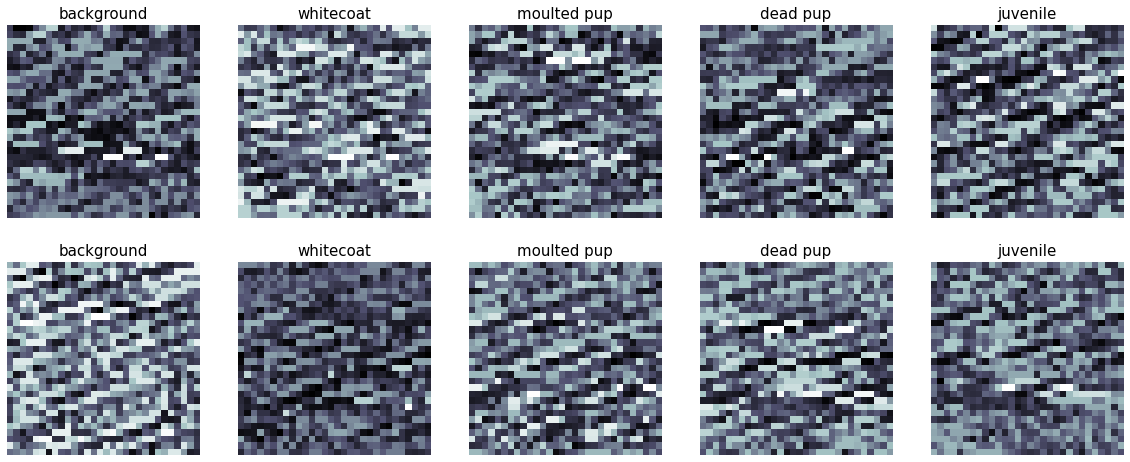

In [76]:
fig=plt.figure(figsize=(20, 8))

image_background1 = X_train_HoG.iloc[7778].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,1)
plt.imshow(image_background1, cmap="bone")
plt.title("background", fontsize=fontsizes['title'])
plt.axis("off")

image_whitecoat1 = X_train_HoG.iloc[0].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,2)
plt.imshow(image_whitecoat1, cmap="bone")
plt.title("whitecoat", fontsize=fontsizes['title'])
plt.axis("off")

image_moultedpup1 = X_train_HoG.iloc[4981].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,3)
plt.imshow(image_moultedpup1, cmap="bone")
plt.title("moulted pup", fontsize=fontsizes['title'])
plt.axis("off")

image_deadpup1 = X_train_HoG.iloc[7253].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,4)
plt.imshow(image_deadpup1, cmap="bone")
plt.title("dead pup", fontsize=fontsizes['title'])
plt.axis("off")

image_juvenile1 = X_train_HoG.iloc[7530].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,5)
plt.imshow(image_juvenile1, cmap="bone")
plt.title("juvenile", fontsize=fontsizes['title'])
plt.axis("off")

image_background2 = X_train_HoG.iloc[62205].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,6)
plt.imshow(image_background2, cmap="bone")
plt.title("background", fontsize=fontsizes['title'])
plt.axis("off")

image_whitecoat2 = X_train_HoG.iloc[4976].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,7)
plt.imshow(image_whitecoat2, cmap="bone")
plt.title("whitecoat", fontsize=fontsizes['title'])
plt.axis("off")

image_moultedpup2 = X_train_HoG.iloc[7248].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,8)
plt.imshow(image_moultedpup2, cmap="bone")
plt.title("moulted pup", fontsize=fontsizes['title'])
plt.axis("off")

image_deadpup2 = X_train_HoG.iloc[7529].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,9)
plt.imshow(image_deadpup2, cmap="bone")
plt.title("dead pup", fontsize=fontsizes['title'])
plt.axis("off")

image_juvenile2 = X_train_HoG.iloc[7777].to_numpy().reshape(30, 30)
fig.add_subplot(2,5,10)
plt.imshow(image_juvenile2, cmap="bone")
plt.title("juvenile", fontsize=fontsizes['title'])
plt.axis("off")

plt.savefig("reconstructed_images_multi.png")
plt.show()

Observation:
* There is little difference between a background and a seal

--> Reconstructed image doesn't give any information useful for classification.    

### B. Normal distribution

In [14]:
X_train_normal_dist.head(5)

,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915
0,-1.280041,1.238382,2.661622,-2.942723,0.256651,-0.847558,-0.144272,-3.628990,-0.317223,2.649822,5.004708,-4.185132,-0.319661,-0.403782,0.837098,0.674467
1,1.734251,3.321642,-1.756527,3.417488,-1.973764,-0.026902,2.733768,1.420462,0.212293,0.360131,1.912276,6.072646,-3.138425,-1.144073,-0.793034,-2.189273
2,-1.218798,-0.706921,-0.970352,1.446063,1.069938,4.533852,2.815861,-0.491769,-0.232733,1.098961,-0.329036,2.557483,-1.199582,0.998466,-1.331319,1.782689
3,-2.192398,-1.735968,2.031139,0.725424,-0.305053,-1.314722,-1.477061,3.391574,3.039285,-0.780832,0.132886,2.852817,4.059947,-0.462990,3.677201,-4.173188
4,-0.691028,-4.928038,-2.162437,1.651693,0.314290,2.053126,6.163571,1.326052,-2.152279,3.103169,-1.078835,-0.374443,1.339320,-0.335326,0.810662,-0.089223


In [15]:
X_train_normal_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62210 entries, 0 to 62209
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   900     62210 non-null  float64
 1   901     62210 non-null  float64
 2   902     62210 non-null  float64
 3   903     62210 non-null  float64
 4   904     62210 non-null  float64
 5   905     62210 non-null  float64
 6   906     62210 non-null  float64
 7   907     62210 non-null  float64
 8   908     62210 non-null  float64
 9   909     62210 non-null  float64
 10  910     62210 non-null  float64
 11  911     62210 non-null  float64
 12  912     62210 non-null  float64
 13  913     62210 non-null  float64
 14  914     62210 non-null  float64
 15  915     62210 non-null  float64
dtypes: float64(16)
memory usage: 7.6 MB


### C. RGB colour histogram

In [77]:
X_train_colour_hists.shape

(62210, 48)

In [78]:
X_train_colour_hists.head(5)

,916,917,918,919,920,921,922,923,924,925,...,954,955,956,957,958,959,960,961,962,963
0,2.0,30.0,66.0,114.0,155.0,168.0,268.0,320.0,481.0,1096.0,...,179.0,184.0,358.0,446.0,686.0,1102.0,297.0,42.0,16.0,5.0
1,61.0,967.0,1067.0,407.0,236.0,179.0,117.0,96.0,98.0,86.0,...,185.0,125.0,115.0,91.0,138.0,109.0,87.0,59.0,23.0,10.0
2,53.0,228.0,457.0,667.0,577.0,615.0,379.0,279.0,126.0,45.0,...,373.0,266.0,152.0,52.0,34.0,31.0,44.0,48.0,9.0,6.0
3,13.0,54.0,159.0,287.0,396.0,503.0,585.0,724.0,581.0,128.0,...,649.0,646.0,532.0,158.0,77.0,36.0,31.0,18.0,5.0,6.0
4,35.0,731.0,1420.0,788.0,156.0,43.0,51.0,77.0,57.0,60.0,...,47.0,83.0,87.0,63.0,61.0,35.0,24.0,17.0,8.0,4.0


Extract the individual colour channels in the histogram

In [79]:
red_channel = X_train_colour_hists.iloc[:, :16]
blue_channel = X_train_colour_hists.iloc[:, 16:32]
green_channel = X_train_colour_hists.iloc[:, 32:]

Visualise RGB histogram for a single image

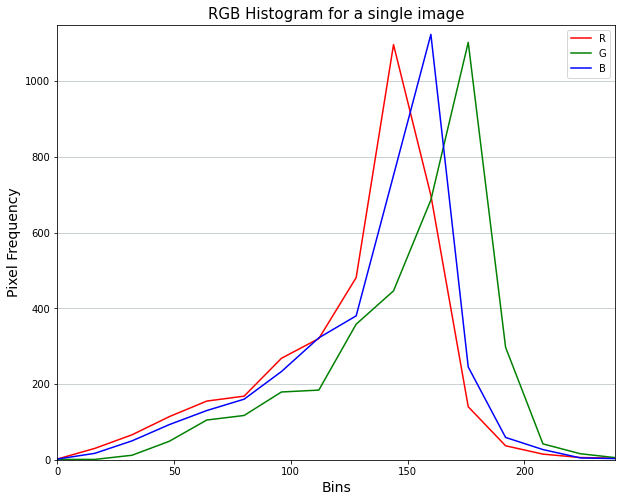

In [80]:
# Matplot lib plot (line graph).
plt.figure(figsize=(10, 8))
bin_labels = [i for i in range(0, 255, 16)]
plt.plot(bin_labels, red_channel.iloc[0].values, color="red", label="R")
plt.plot(bin_labels, green_channel.iloc[0].values, color="green", label="G")
plt.plot(bin_labels, blue_channel.iloc[0].values, color="blue", label="B")
plt.xlim((0, 255-16))
plt.ylim(0, max(max(red_channel.iloc[0].values), max(green_channel.iloc[0].values), max(blue_channel.iloc[0].values)) + 25)  # Add padding.
plt.xlabel("Bins", fontsize=fontsizes['axis'])
plt.ylabel("Pixel Frequency", fontsize=fontsizes['axis'])
plt.title("RGB Histogram for a single image", fontsize=fontsizes['title'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.5)
plt.legend()
    
# Save and display chart.
plt.savefig("rgb_hist_single_image.png")
plt.show()

Visualise the aggregate RGB histogram for all images

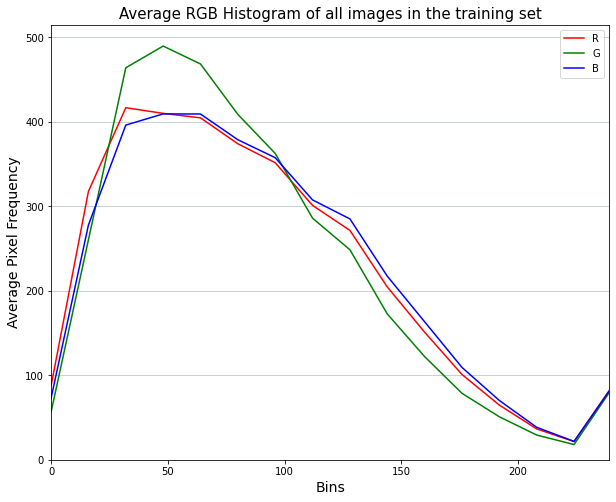

In [20]:
# Matplot lib plot (line graph).
plt.figure(figsize=(10, 8))
plt.plot(bin_labels, red_channel.mean().values, color="red", label="R")
plt.plot(bin_labels, green_channel.mean().values, color="green", label="G")
plt.plot(bin_labels, blue_channel.mean().values, color="blue", label="B")
plt.xlim((0, 255-16))
plt.ylim(0, max(max(red_channel.mean().values), max(green_channel.mean().values), max(blue_channel.mean().values)) + 25)  # Add padding.
plt.xlabel("Bins", fontsize=fontsizes['axis'])
plt.ylabel("Average Pixel Frequency", fontsize=fontsizes['axis'])
plt.title("Average RGB Histogram of all images in the training set", fontsize=fontsizes['title'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.5)
plt.legend()
    
# Save and display chart.
plt.savefig("rgb_avg_hist_all_training_set.png")
plt.show()

### D. Class ID

In [30]:
y_train_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62210 entries, 0 to 62209
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       62210 non-null  object
dtypes: object(1)
memory usage: 486.1+ KB


Count the occurences (and relative % distribution) of each class in the training set.

In [57]:
total_occurences = y_train_multi.shape[0]
class_distribution = {
    'whitecoat': {
        'occurences': y_train_multi[0].value_counts()["whitecoat"],
        'distribution': round(y_train_multi[0].value_counts()["whitecoat"] / total_occurences, 5)
    },
    'background': {
        'occurences': y_train_multi[0].value_counts()["background"],
        'distribution': round(y_train_multi[0].value_counts()["background"] / total_occurences, 5)
    },
    'dead pup': {
        'occurences': y_train_multi[0].value_counts()["dead pup"],
        'distribution': round(y_train_multi[0].value_counts()["dead pup"] / total_occurences, 5)
    },
    'juvenile': {
        'occurences': y_train_multi[0].value_counts()["juvenile"],
        'distribution': round(y_train_multi[0].value_counts()["juvenile"] / total_occurences, 5)
    },
    'moulted pup': {
        'occurences': y_train_multi[0].value_counts()["moulted pup"],
        'distribution': round(y_train_multi[0].value_counts()["moulted pup"] / total_occurences, 5)
    },
}
class_distribution

{'whitecoat': {'occurences': 4981, 'distribution': 0.08007},
 'background': {'occurences': 54432, 'distribution': 0.87497},
 'dead pup': {'occurences': 277, 'distribution': 0.00445},
 'juvenile': {'occurences': 248, 'distribution': 0.00399},
 'moulted pup': {'occurences': 2272, 'distribution': 0.03652}}

Plot the distribution of classes in the training set in a bar chart.

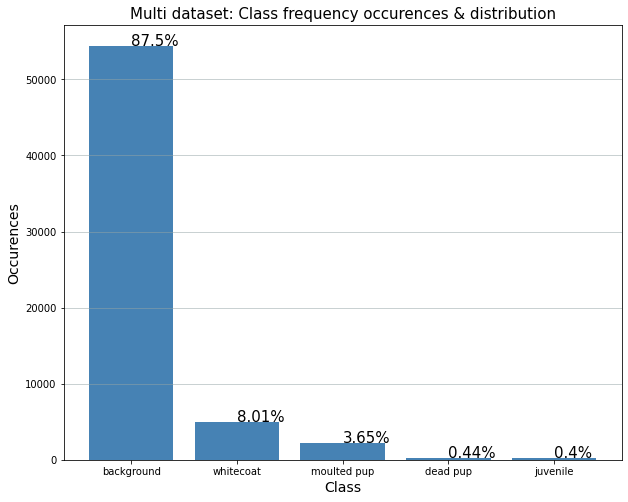

In [58]:
# Data preparation for bar chart.
data = [
    class_distribution['background']['occurences'],
    class_distribution['whitecoat']['occurences'],
    class_distribution['moulted pup']['occurences'],
    class_distribution['dead pup']['occurences'],
    class_distribution['juvenile']['occurences']
]
# value_labels = [class_distribution['seal']['distribution'], class_distribution['background']['distribution']]
x_axis_labels = ["background", "whitecoat", "moulted pup", "dead pup", "juvenile"]

# Matplot lib bar chart.
plt.figure(figsize=(10, 8))
plt.xticks(range(len(data)), x_axis_labels)
plt.xlabel("Class", fontsize=fontsizes['axis'])
plt.ylabel("Occurences", fontsize=fontsizes['axis'])
plt.title("Multi dataset: Class frequency occurences & distribution", fontsize=fontsizes['title'])
plt.bar(x_axis_labels, data, color='steelblue')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.5)

# Add value labels for each bar.
for a, b in zip(x_axis_labels, data):
    plt.text(a, b, "{}%".format(str(round(class_distribution[a]['distribution'] * 100, 2))), fontsize=15)
    
# Save and display chart.
plt.savefig("multi_class_distribution.png")
plt.show()

### E. Correlation

In [81]:
# temp_data = X_train_binary.concat(y_train_binary, axis=1)
temp_data = pd.concat([X_train_multi, y_train_multi], axis=1)

In [82]:
correlation_matrix = temp_data.corr()

In [83]:
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
0,1.000000,0.388745,0.219949,0.092884,0.108756,-0.024468,0.061571,0.215500,0.380777,0.324075,...,0.097345,0.074151,0.067999,0.042945,0.022741,-0.002070,-0.029716,-0.089810,-0.235822,-0.343559
1,0.388745,1.000000,0.515055,0.260867,0.077206,-0.204973,-0.257241,-0.155534,0.065720,0.164581,...,0.097664,0.096038,0.085857,0.063156,0.031484,0.001272,-0.025729,-0.067761,-0.169202,-0.227236
2,0.219949,0.515055,1.000000,0.480091,0.221800,-0.135615,-0.272108,-0.264674,-0.110492,0.091753,...,0.113465,0.106074,0.090703,0.068948,0.034869,-0.003481,-0.036077,-0.077017,-0.169665,-0.212596
3,0.092884,0.260867,0.480091,1.000000,0.414969,0.077781,-0.148070,-0.222291,-0.163376,0.028317,...,0.102992,0.082700,0.067640,0.040231,0.008066,-0.026142,-0.049678,-0.084797,-0.172714,-0.211647
4,0.108756,0.077206,0.221800,0.414969,1.000000,0.407485,0.178999,0.024865,-0.045375,-0.029298,...,0.089163,0.062447,0.044336,0.020868,0.000932,-0.022146,-0.040774,-0.072734,-0.162387,-0.230415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,-0.002070,0.001272,-0.003481,-0.026142,-0.022146,-0.014858,0.009702,0.023156,0.018129,-0.004579,...,-0.066233,0.099485,0.285446,0.545519,0.807053,1.000000,0.805025,0.497614,0.270341,-0.002564
960,-0.029716,-0.025729,-0.036077,-0.049678,-0.040774,-0.020704,0.004571,0.012414,0.004367,-0.022646,...,-0.126384,-0.016734,0.118702,0.294063,0.524186,0.805025,1.000000,0.789823,0.466384,0.075776
961,-0.089810,-0.067761,-0.077017,-0.084797,-0.072734,-0.035115,-0.016770,-0.016361,-0.022092,-0.064513,...,-0.165392,-0.083824,0.001111,0.120936,0.276844,0.497614,0.789823,1.000000,0.724038,0.215676
962,-0.235822,-0.169202,-0.169665,-0.172714,-0.162387,-0.078546,-0.067711,-0.089883,-0.093672,-0.169418,...,-0.218051,-0.148434,-0.080083,0.013028,0.125078,0.270341,0.466384,0.724038,1.000000,0.565287


In [84]:
print("10 features with the strongest positive correlation with the  output:")
display(correlation_matrix.iloc[963].sort_values(ascending=False).head(11))
print("\n10 features with the strongest negative correlation with the  output:")
display(correlation_matrix.iloc[963].sort_values(ascending=True).head(10))

10 features with the strongest positive correlation with the  output:


963    1.000000
947    0.999536
931    0.999236
962    0.565287
930    0.564637
946    0.549370
961    0.215676
929    0.206197
945    0.189688
948    0.082540
960    0.075776
Name: 963, dtype: float64


10 features with the strongest negative correlation with the  output:


891   -0.377049
855   -0.373452
738   -0.349698
882   -0.348397
0     -0.343559
747   -0.342780
774   -0.339837
819   -0.338024
153   -0.333938
117   -0.327793
Name: 963, dtype: float64

**Observations**:
* The features that have the strongest positive correlation with the output label are between the range 929 to  963, falling into the category of RGB histogram features.
* The features that have the strongest negative correlation with the output label are between the range 0 to 891, falling into the category of HoG features.
* No normal distribution features show strong correlation.

--> Can drop the normal distribution features from the data set.

# Part 4: Prepare inputs

### Split Train/Validation data sets

The data is already split into training and testing sets. To avoid data snooping, the testing set is ignored until the evaluation section.

However, the training set is further split between a training and a validation set to evaluate its performance during training.

A randomised 80%/20% split is used rather than stratified sampling because the dataset is large enough. According to Hands-On ML, if the dataset is large enough, the risk of introducing sampling bias is low (he mentions a set of 1,000 rows, whereas ours has 62210 rows).

The random number generator's seed is set at a fixed value to ensure that it always generates the same shuffle indices when re-running the code, ensuring reproducibility.

In [28]:
# X_train, X_validate, y_train, y_validate = train_test_split(X_train_binary, 
#                                                             y_train_binary, 
#                                                             test_size=0.2, 
#                                                             random_state=RANDOM_SEED)

Confirm new training dataset sizes:

In [29]:
# print("Training set split:\nTrain set size = {}\nValidation set size = {}".format(X_train.shape, X_validate.shape))

### Data conversion

Convert class ID output to boolean integer format for logistic regression (*1* if it's a "seal", *0* if it's a "background").

In [1]:
# y_train_seal = (y_train_binary == "seal").astype(np.int)
# y_train_seal_unravelled = y_train_seal.values.ravel()

NameError: name 'y_train_binary' is not defined

# Parts 5/6: Select & train classification models

In [2]:
def perform_cross_validation_accuracy(model, X, y, folds = 3):
    accuracy_scores = cross_val_score(model, X, y, cv=folds, scoring="accuracy")
    print("Accuracies: {}".format(accuracy_scores))
    print("Average accuracy over {} folds: {}%".format(folds, round(accuracy_scores.mean() * 100, 2)))

In [16]:
def plot_pretty_confusion_matrix(cm, labels: list, title: str, is_normalised: bool) -> None:
    annot_format = "d"
    if is_normalised:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        annot_format = ".2f"
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    fig = plt.figure(figsize=(8,5))
    heatmap = sns.heatmap(cm_df, cmap="YlGnBu", annot=True, fmt=annot_format)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsizes['ticks'])
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsizes['ticks'])
    plt.ylabel('True label', fontsize=fontsizes['axis'])
    plt.xlabel('Predicted label', fontsize=fontsizes['axis'])
    plt.title(title, fontsize=fontsizes['title'])

In [33]:
def save_model(model, model_type):
    """
    Function to save the model to a file.
    :param model:
    :param model_type:
    :return:
    """
    joblib.dump(model, "trained_models/{}.pkl".format(model_type))

In [34]:
def load_model(model_type):
    """
    Function to load model.
    :param model_type:
    :return:
    """
    return joblib.load("trained_models/{}.pkl".format(model_type))

## A. Binary SGD Classifier

In [12]:
%%time
y_train_unravelled = y_train_multi.values.ravel()
sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED)
sgd_classifier.fit(X_train_multi, y_train_multi)
# use values to get the values in an array, so a shape of (n,1) and then ravel() to the convert that array shape to (n, )

CPU times: user 74 µs, sys: 0 ns, total: 74 µs
Wall time: 78 µs


#### 3-fold using all features

In [13]:
%%time
perform_cross_validation_accuracy(sgd_classifier, X_train_multi, y_train_unravelled)

Accuracies: [0.81810291 0.8476636  0.87490355]
Average accuracy over 3 folds: 84.69%
CPU times: user 3min 46s, sys: 2.43 s, total: 3min 49s
Wall time: 3min 50s


In [14]:
sgd_classifier_accuracy_predictions = cross_val_predict(sgd_classifier, X_train_multi, y_train_unravelled, cv=3)
cm = confusion_matrix(y_train_multi, sgd_classifier_accuracy_predictions)

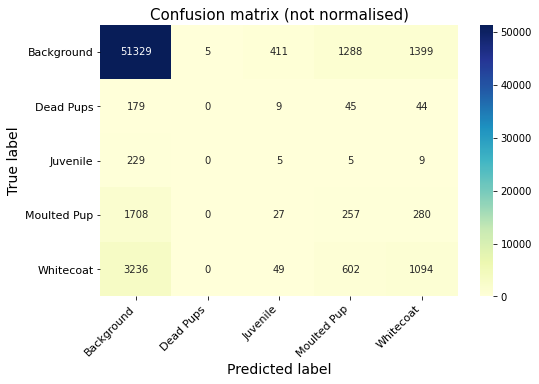

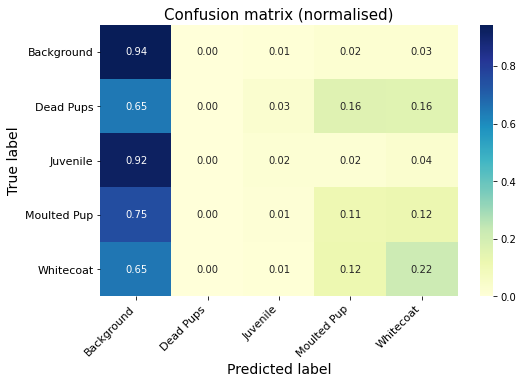

In [18]:
plot_pretty_confusion_matrix(cm, ["Background", "Dead Pups", "Juvenile", "Moulted Pup", "Whitecoat"], "Confusion matrix (not normalised)", False)
plot_pretty_confusion_matrix(cm, ["Background", "Dead Pups", "Juvenile", "Moulted Pup", "Whitecoat"], "Confusion matrix (normalised)", True)

Observations:

* Many classifications are being made as "background" and because 87.5% of the images are backgrounds, the classifier will be right most of the time!

--> Accuracy is not a very good measure of the efficiency of the classifier. If the classifier always classified all images as "background", it would be  right 87.5% of the time, which is very high for a dumb classifier.

#### 3-fold using HoG features only

In [38]:
%%time
perform_cross_validation_accuracy(sgd_classifier, X_train_HoG, y_train_seal_unravelled, 10)

Accuracies: [0.97524514 0.95563414 0.97203022 0.96736859 0.97122649 0.96913679
 0.96270696 0.95386594 0.94872207 0.93714837]
Average accuracy over 10 folds: 96.13%
CPU times: user 22.5 s, sys: 3 s, total: 25.5 s
Wall time: 21.3 s


#### 3-fold using RGB Histogram features only

In [39]:
%%time
perform_cross_validation_accuracy(sgd_classifier, X_train_colour_hists, y_train_seal_unravelled, 10)

Accuracies: [0.76273911 0.83250281 0.89165729 0.88474522 0.87831538 0.88426298
 0.86963511 0.70262016 0.85227455 0.50699244]
Average accuracy over 10 folds: 80.66%
CPU times: user 43.3 s, sys: 745 ms, total: 44.1 s
Wall time: 39.1 s


#### 3-fold using HoG + RGB Histogram features

In [40]:
X_train_binary_good_features = pd.concat([X_train_HoG, X_train_colour_hists], axis=1)
X_train_binary_good_features.shape

(62210, 948)

In [41]:
%%time
X_train_binary_good_features = pd.concat([X_train_HoG, X_train_colour_hists], axis=1)
perform_cross_validation_accuracy(sgd_classifier, X_train_binary_good_features, y_train_seal_unravelled, 3)

Accuracies: [0.89588658 0.8911125  0.80420525]
Average accuracy over 3 folds: 86.37%
CPU times: user 1min 3s, sys: 1.14 s, total: 1min 5s
Wall time: 1min 3s


## B. Logistic Regression

In [42]:
%%time
logistic_regression = LogisticRegression(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED)
logistic_regression.fit(X_train_binary, y_train_seal_unravelled)

CPU times: user 6min 34s, sys: 11.1 s, total: 6min 45s
Wall time: 1min 8s


/Users/ajaamour/Environments/Seal-Pup-Aerial-Imagery-Classifier/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

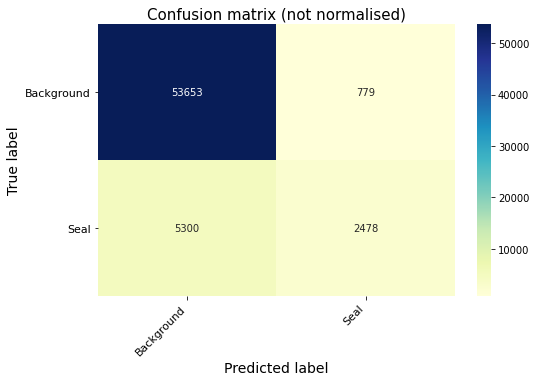

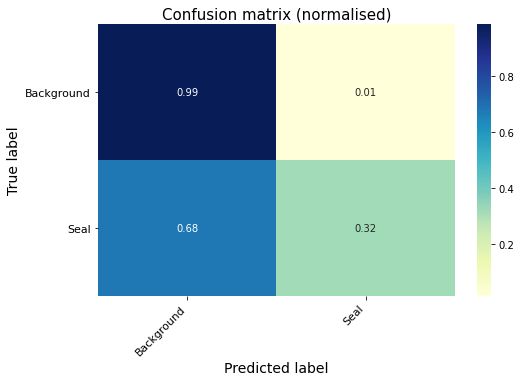

In [43]:
y_prediction = logistic_regression.predict(X_train_binary)
cm = confusion_matrix(y_train_seal, y_prediction)
plot_pretty_confusion_matrix(cm, ["Background", "Seal"], "Confusion matrix (not normalised)", False)
plot_pretty_confusion_matrix(cm, ["Background", "Seal"], "Confusion matrix (normalised)", True)

## C. SVC

In [44]:
%%time
svc_classifier = LinearSVC(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED)
svc_classifier.fit(X_train_binary, y_train_seal_unravelled)

CPU times: user 2min 37s, sys: 538 ms, total: 2min 38s
Wall time: 2min 39s


/Users/ajaamour/Environments/Seal-Pup-Aerial-Imagery-Classifier/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=111, tol=0.001,
          verbose=0)

In [47]:
%%time
perform_cross_validation_accuracy(svc_classifier, X_train_binary, y_train_seal_unravelled)

/Users/ajaamour/Environments/Seal-Pup-Aerial-Imagery-Classifier/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ajaamour/Environments/Seal-Pup-Aerial-Imagery-Classifier/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracies: [0.69233737 0.87987655 0.87784529]
Average accuracy over 3 folds: 81.67%
CPU times: user 6min 28s, sys: 4.52 s, total: 6min 33s
Wall time: 6min 35s


/Users/ajaamour/Environments/Seal-Pup-Aerial-Imagery-Classifier/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Part 7: Evaluating & comparing models performance 

### Load testing data

In [45]:
X_test = pd.read_csv("../data/binary/X_test.csv")

# Part 8: Critical discussion of the results, approach and methods

In [46]:
#todo

# Helper Functions